In [40]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [41]:
# Download MNIST data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

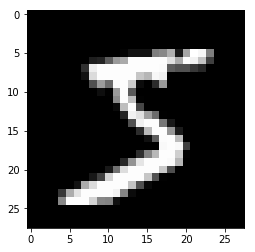

In [42]:
# Plot an example training datapoint
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [43]:
# Images are 28x28 pixel images, which we flatten to a 784x1 (28 *28) array
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Display example picture as an array
print(X_train[0])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    3.   18.   18.   18.
  126.  136.  175.   26.  166.  255.  247.  127.   

In [44]:
# Values range from 0-255 (256 gradients), so divide by 255 to normalize between 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [45]:
# Encode outputs/prediction (y is the labels and what we are trying to predict)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [46]:
# Create the neural network w/ keras (simple case, not a CNN)
def neural_network():
    # Model is imported from keras
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
model = neural_network()
# Set parameters and inputs for model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
7s - loss: 0.2832 - acc: 0.9200 - val_loss: 0.1372 - val_acc: 0.9604
Epoch 2/3
7s - loss: 0.1088 - acc: 0.9690 - val_loss: 0.0880 - val_acc: 0.9727
Epoch 3/3
7s - loss: 0.0712 - acc: 0.9794 - val_loss: 0.0762 - val_acc: 0.9759
Error: 2.41%


In [48]:
# Now try to improve accuracy with CNN, important additional dependencies
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape data to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [50]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [51]:
def convolutional_neural_network():
    # Create NN with keras
    model = Sequential()
    # Adds a convolution to the images, 32 feature filters of 5x5 size that will 'slide' across the 28x28 size images
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    # Once we have applied feature filters, compress every 2x2 array subsection of images into single value using max 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Drop 20% of data randomly (helps avoid overfitting/'memorizing' training data set)
    model.add(Dropout(0.2))
    # Flatten data and feed through a 'normal' neural network with one hidden layer 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
# NOTE: This cell can take a very long time to run
model = convolutional_neural_network()
# Set model parameters
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


KeyboardInterrupt: 